## MBTI Prediction from Social Media Platforms
LIN371: Machine Learning for Text Analysis

Predict MBTI personality types using data from self-reported Reddit and Twitter data. 

In [2]:
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt

In [5]:
reddit_df = pd.read_csv('mbti-reddit.csv')
reddit_df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


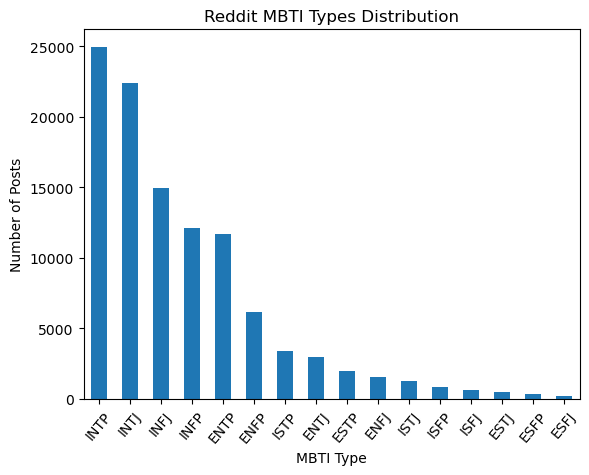

In [10]:
# Distribution of MBTI types in Reddit dataset
reddit_types = reddit_df.groupby('type')
reddit_types.describe().head()

plt.figure()
reddit_types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('MBTI Type')
plt.ylabel('Number of Posts')
plt.title('Reddit MBTI Types Distribution')
plt.show()

In [11]:
twitter_df = pd.read_csv('mbti-twitter.csv')
twitter_df.head()


,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


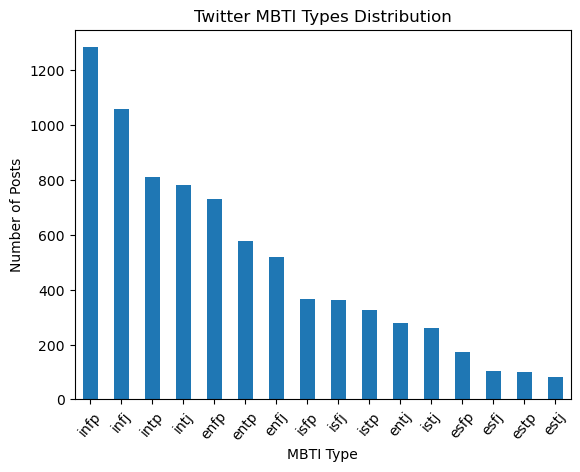

In [12]:
# Distribution of MBTI types in Twitter dataset
twitter_types = twitter_df.groupby('label')
twitter_types.describe().head()

plt.figure()
twitter_types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('MBTI Type')
plt.ylabel('Number of Posts')
plt.title('Twitter MBTI Types Distribution')
plt.show()